In [5]:
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np

import matplotlib
import sys


sys.path.append('/mnt/netapp2/Store_uni/home/usc/ie/dcr/software/hk')

# Import Diego's tools
from WCSimFilePackages.npz_to_df import simple_truehits_info_to_df
from WCSimFilePackages.npz_to_df import super_simple_track_info_to_df

from tqdm.notebook import tqdm

import hipy.hipy.pltext as pltext
import hipy.hipy.utils  as ut

pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)

%load_ext autoreload
%autoreload 2

pltext.style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
npz     = '/mnt/netapp2/Store_uni/home/usc/ie/dcr/software/hk/WCSim_old/install/npz/100kneutrons_NiCf_piFix_QGSP_BIC_HP.npz'
nevents = 30901

# Creación del DataFrame de DigiHits usando la función digihits_info_to_df
# df_trueHits = simple_truehits_info_to_df(npz).dropna()
print("1")
df_simpleTracks = super_simple_track_info_to_df(npz).dropna()
print("2")

1


2


In [ ]:
df_trueHits.head()

,event_id,true_hit_parent,true_hit_time,true_hit_pmt
0,0,79,8260.654297,1048
0,0,46,42295.707031,1048
0,0,46,42295.726562,1048
0,0,79,8260.705078,1049
0,0,79,8260.847656,1007


: 

In [7]:
df_simpleTracks[df_simpleTracks["event_id"].values == 1].sort_values("track_id").head()

,event_id,track_pid,track_id,track_parent,track_energy,track_xi,track_yi,track_zi
1,1,0,0,0,0.0,0.0,0.0,0.0
1,1,0,0,0,0.0,0.0,0.0,0.0
1,1,2112,1,0,941.33429,0.0,0.0,0.0
1,1,2112,2,0,941.261475,0.0,0.0,0.0
1,1,2112,3,0,939.904053,0.0,0.0,0.0


# General Simulation Checks

In [6]:
gamma_energy = df_simpleTracks[(df_simpleTracks["track_pid"].values == 22)]["track_energy"].values

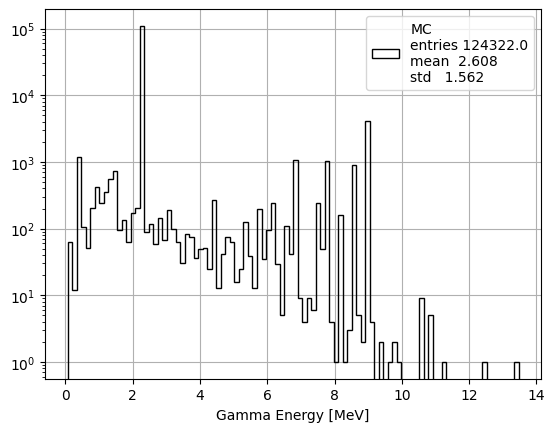

In [7]:
pltext.hist(gamma_energy, 100, ylog=True, xylabels="Gamma Energy [MeV]", label="MC");

In [31]:
windowTotal = np.concatenate([windowTimeGammasFromNi, windowTimeGammasFromH])

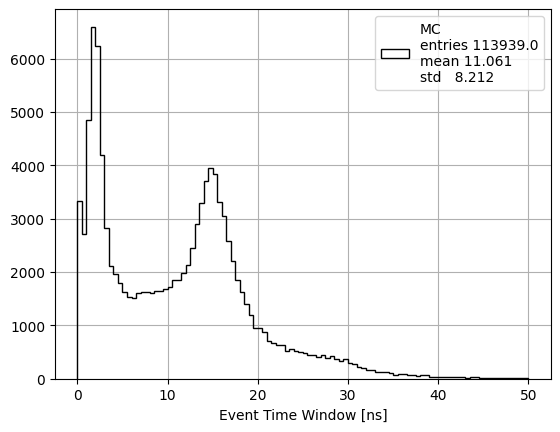

In [33]:
pltext.hist(windowTotal, 100, range=(0, 50), xylabels="Event Time Window [ns]", label="MC");

# Captures In The Ball VS. Outside

In [8]:
print(len(df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                (df_simpleTracks["track_ri"].values >= 6.8) & 
                (df_simpleTracks["track_pid"].values != 22)]["event_id"].values))

print(len(df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                (df_simpleTracks["track_ri"].values < 6.8) & 
                (df_simpleTracks["track_pid"].values != 22)]["event_id"].values))

KeyError: 'track_creator_process'

# Captures In Nickel VS. Hydrogen

In [ ]:
captureIDs = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                (df_simpleTracks["track_ri"].values < 6.8) & 
                (df_simpleTracks["track_pid"].values != 22)]["track_pid"].values

In [ ]:
captureIDs = [str(i)[4:7] for i in captureIDs]
captureIDs = [i for i in captureIDs if i != ""]

In [ ]:
captureIDs = [int(i)/10 for i in captureIDs]

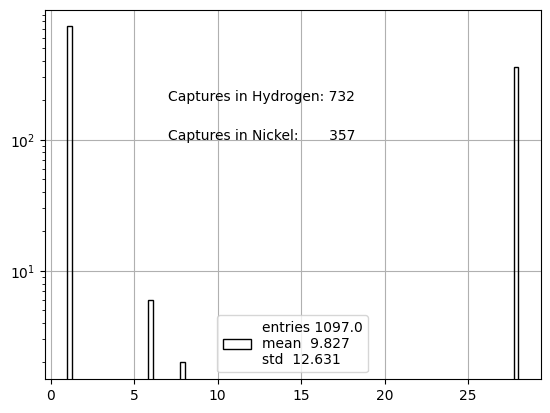

In [ ]:
pltext.hist(captureIDs, 100, ylog=True);
plt.annotate(f"Captures in Hydrogen: {captureIDs.count(1)}", (7, 200));
plt.annotate(f"Captures in Nickel:       {captureIDs.count(28)}", (7, 100));

# Light Produced By Captures In Water VS. Captures In The Ni Ball

In [34]:
df_GammasInWater = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                   (df_simpleTracks["track_ri"].values >= 6.8) & 
                                   (df_simpleTracks["track_pid"].values == 22)]

eventsWaterLight = np.unique(df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                             (df_simpleTracks["track_ri"].values >= 6.8) & 
                                             (df_simpleTracks["track_pid"].values == 22)]["event_id"])

hitsFromWaterGamma = []

for ev in tqdm(eventsWaterLight, total=len(eventsWaterLight)):
    NickelsFromWaterCapture = df_GammasInWater[(df_GammasInWater["event_id"].values == ev)]["track_id"].values
    
    # print(gammasFromWaterCapture)
    electronsFromGamma = df_simpleTracks[(df_simpleTracks["event_id"].values == ev) & 
                                         (df_simpleTracks["track_parent"].isin(gammasFromWaterCapture))]["track_id"].values

    # print(electronsFromNickel)

    hitsFromWaterGamma.append(len(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                              (df_trueHits["true_hit_parent"].isin(electronsFromGamma))]))

  0%|          | 0/1585 [00:00<?, ?it/s]

NameError: name 'gammasFromWaterCapture' is not defined

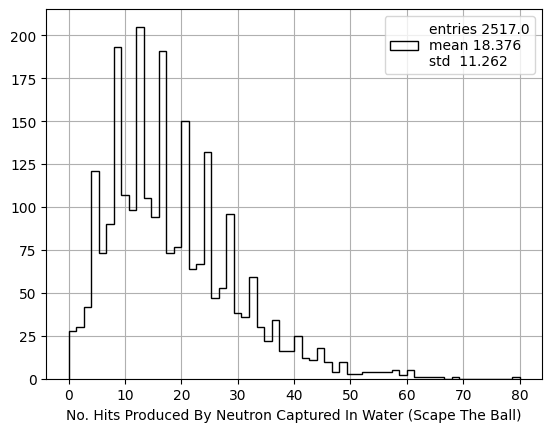

In [22]:
pltext.hist(hitsFromWaterGamma, 60, xylabels="No. Hits Produced By Neutron Captured In Water (Scape The Ball)");

In [35]:
df_GammasInWater = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_ri"].values >= 6.8) & 
                                (df_simpleTracks["track_pid"].values == 22)]

gammasEnergyWater = df_GammasInWater["track_energy"].values

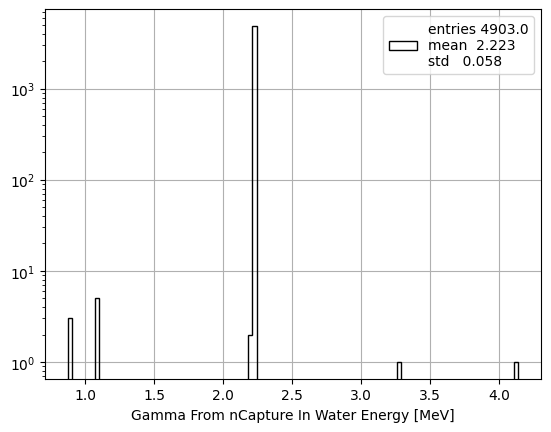

In [36]:
pltext.hist(gammasEnergyWater, 100, ylog=True, xylabels="Gamma From nCapture In Water Energy [MeV]");

In [37]:
df_GammasInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_ri"].values < 6.8) & 
                                (df_simpleTracks["track_pid"].values == 22)]

eventsBallLight = np.unique(df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                            (df_simpleTracks["track_ri"].values < 6.8) & 
                                            (df_simpleTracks["track_pid"].values == 22)]["event_id"])

hitsFromBallGamma = []

for ev in tqdm(eventsBallLight, total=len(eventsBallLight)):
    gammasFromBallCapture = df_GammasInBall[(df_GammasInBall["event_id"].values == ev)]["track_id"].values
    
    # print(gammasFromWaterCapture)
    electronsFromGamma = df_simpleTracks[(df_simpleTracks["event_id"].values == ev) & 
                                         (df_simpleTracks["track_parent"].isin(gammasFromBallCapture))]["track_id"].values

    # print(electronsFromGamma)

    hitsFromBallGamma.append(len(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                             (df_trueHits["true_hit_parent"].isin(electronsFromGamma))]))

  0%|          | 0/824 [00:00<?, ?it/s]

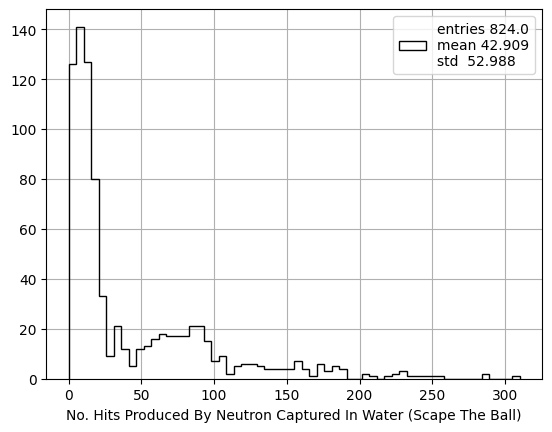

In [38]:
pltext.hist(hitsFromBallGamma, 60, xylabels="No. Hits Produced By Neutron Captured In Water (Scape The Ball)");

# Gamma's Energy From nCapture In Ball

In [164]:
df_GammasInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                  (df_simpleTracks["track_rf"].values >= 6.75) &
                                  (df_simpleTracks["track_pid"].values == 22)]

gammasEnergyBall = df_GammasInBall["track_energy"].values

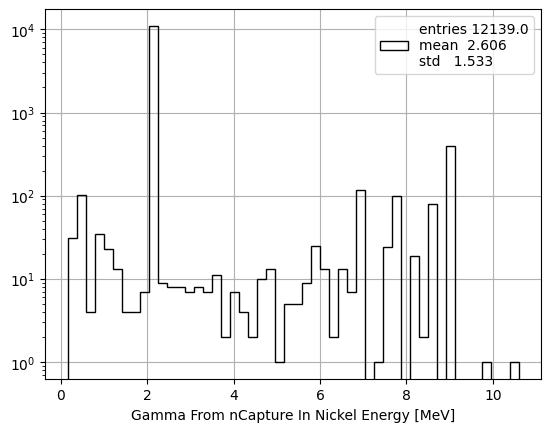

In [165]:
pltext.hist(gammasEnergyBall, 50, ylog=True, xylabels="Gamma From nCapture In Nickel Energy [MeV]");

In [41]:
df_GammasInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_ri"].values < 6.8) & 
                                (df_simpleTracks["track_pid"].values == 22)]

gammasEnergyBall = df_GammasInBall["track_energy"].values

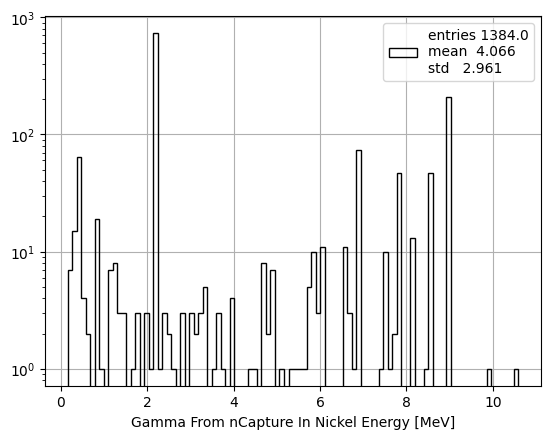

In [42]:
pltext.hist(gammasEnergyBall, 100, ylog=True, xylabels="Gamma From nCapture In Nickel Energy [MeV]");

### Time Window In Which The Hits Arrive

In [43]:
df_GammasInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_ri"].values < 6.8) & 
                                (df_simpleTracks["track_pid"].values == 22)]

eventsBallLight = np.unique(df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                            (df_simpleTracks["track_ri"].values < 6.8) & 
                                            (df_simpleTracks["track_pid"].values == 22)]["event_id"])

timeWindowFromBallGamma = []
timeRMSFromBallGamma = []

for ev in tqdm(eventsBallLight, total=len(eventsBallLight)):
    gammasFromBallCapture = df_GammasInBall[(df_GammasInBall["event_id"].values == ev)]["track_id"].values
    
    # print(gammasFromWaterCapture)
    electronsFromGamma = df_simpleTracks[(df_simpleTracks["event_id"].values == ev) & 
                                         (df_simpleTracks["track_parent"].isin(gammasFromBallCapture))]["track_id"].values

    # print(electronsFromGamma)

    timeWindowFromBallGamma.append(np.max(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                                (df_trueHits["true_hit_parent"].isin(electronsFromGamma))]["true_hit_time"]) - 
                             np.min(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                                (df_trueHits["true_hit_parent"].isin(electronsFromGamma))]["true_hit_time"])
                            )
    
    timeRMSFromBallGamma.append(np.std(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                                (df_trueHits["true_hit_parent"].isin(electronsFromGamma))]["true_hit_time"]))

  0%|          | 0/824 [00:00<?, ?it/s]

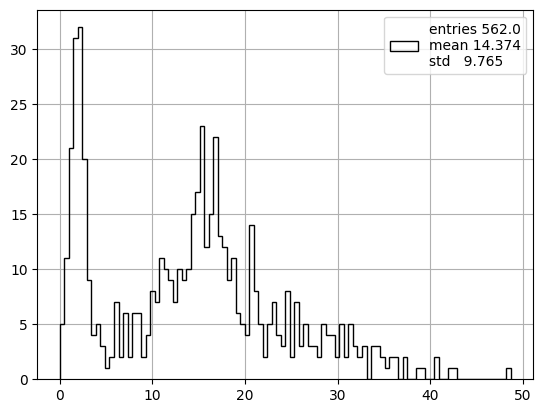

In [44]:
nanMask = np.isfinite(timeWindowFromBallGamma)
timeWindowFromBallGamma = np.array(timeWindowFromBallGamma)[nanMask]

timeWindowFromBallGamma = [i for i in timeWindowFromBallGamma if i < 200 and i > 0]

pltext.hist(timeWindowFromBallGamma, 100, ylog=False);

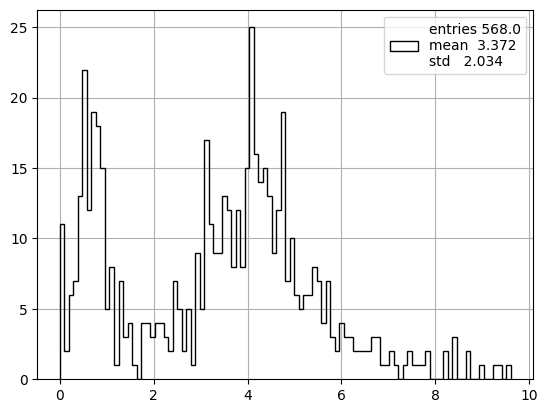

In [45]:
nanMask = np.isfinite(timeRMSFromBallGamma)
timeRMSFromBallGamma = np.array(timeRMSFromBallGamma)[nanMask]

timeRMSFromBallGamma = [i for i in timeRMSFromBallGamma if i < 10]

pltext.hist(timeRMSFromBallGamma, 100);

### Does The Two Peak Structure Represent Two Main Gammas?

In [32]:
df_GammasInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_ri"].values < 6.8) & 
                                (df_simpleTracks["track_pid"].values == 22)]

eventsBallLight = np.unique(df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                            (df_simpleTracks["track_ri"].values < 6.8) & 
                                            (df_simpleTracks["track_pid"].values == 22)]["event_id"])

timeWindowFromBallGamma = []
# timeRMSFromBallGamma = []

for ev in tqdm(eventsBallLight, total=len(eventsBallLight)):
    aatimeWindowFromBallGamma = {}
    gammasFromBallCapture = df_GammasInBall[(df_GammasInBall["event_id"].values == ev)]["track_id"].values

    # print(gammasFromBallCapture)

    for gamma in range(len(gammasFromBallCapture)):
        electronsFromGamma = df_simpleTracks[(df_simpleTracks["event_id"].values == ev) & 
                                            (df_simpleTracks["track_parent"].values == gammasFromBallCapture[gamma])]["track_id"].values

        # print(electronsFromGamma)

        aatimeWindowFromBallGamma[gamma] = (np.max(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                                    (df_trueHits["true_hit_parent"].isin(electronsFromGamma))]["true_hit_time"]) - 
                                np.min(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                                    (df_trueHits["true_hit_parent"].isin(electronsFromGamma))]["true_hit_time"])
                                )
        
    timeWindowFromBallGamma.append(aatimeWindowFromBallGamma)

cleaned_timeWindowFromBallGamma = []

for d in tqdm(timeWindowFromBallGamma, total=len(timeWindowFromBallGamma)):
    # quedarnos con los valores que no sean NaN
    vals = [v for v in d.values() if not np.isnan(v)]
    # reindexar 0,1,2,...
    new_d = {i: v for i, v in enumerate(vals)}
    cleaned_timeWindowFromBallGamma.append(new_d)

  0%|          | 0/2730 [00:00<?, ?it/s]

  0%|          | 0/2730 [00:00<?, ?it/s]

In [33]:
from collections import defaultdict

def agrupar_por_key(data):
    grouped = defaultdict(list)
    for d in data:
        for k, v in d.items():
            grouped[k].append(v)
    return dict(grouped)

# ejemplo con tu lista 'data'
grouped = agrupar_por_key(cleaned_timeWindowFromBallGamma)

# # ahora tienes algo así:
# for k, v in grouped.items():
#     print(f"lista_{k}:", v)


In [34]:
np.mean(grouped[0]), np.mean(grouped[1]), np.mean(grouped[2]), np.mean(grouped[3]), np.mean(grouped[4]), np.mean(grouped[5]), 

(np.float32(12.671881),
 np.float32(11.857649),
 np.float32(10.668175),
 np.float32(11.134006),
 np.float32(10.429328),
 np.float32(10.59101))

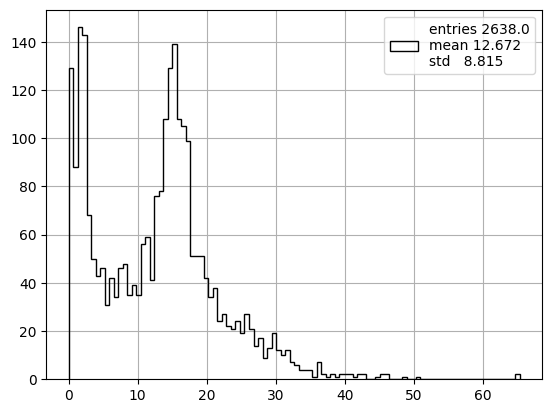

In [94]:
pltext.hist(grouped[0], 100);
# pltext.hist(grouped[1], 100);
# pltext.hist(grouped[2], 100);
# pltext.hist(grouped[3], 100);
# pltext.hist(grouped[4], 100);
# pltext.hist(grouped[5], 100);
# pltext.hist(grouped[6], 100);


# Cherenkov Window From Nickel vs. Hydrogen Capture

### New Approach

In [8]:
"""
Hacemos coincidir los parents de las gammas y los nucleos que se producen tras la captura. 
Así nos formamos un DF con las gammas que vienen exlcusivamente de esa captura.
""" 

df_59Ni = df_simpleTracks.loc[df_simpleTracks['track_pid'] == 1000280590, ['event_id', 'track_parent']]
df_gammas = df_simpleTracks.loc[df_simpleTracks['track_pid'] == 22]
df_gammas_from_59Ni = df_gammas.merge(
    df_59Ni,
    left_on=['event_id', 'track_parent'],
    right_on=['event_id', 'track_parent'],
    how='inner',
    suffixes=('', '_Ni59')
)

df_2H = df_simpleTracks.loc[df_simpleTracks['track_pid'] == 1000010020, ['event_id', 'track_parent']]
df_gammas = df_simpleTracks.loc[df_simpleTracks['track_pid'] == 22]
df_gammas_from_2H = df_gammas.merge(
    df_2H,
    left_on=['event_id', 'track_parent'],
    right_on=['event_id', 'track_parent'],
    how='inner',
    suffixes=('', '_2H')
)

In [9]:
df_gammas_from_2H.head()

,event_id,track_pid,track_id,track_parent,track_energy,track_xi,track_yi,track_zi
0,0,22,11,1,2.22438,1.160981,24.99346,4.929279
1,0,22,21,3,2.22437,13.275597,12.282212,5.550737
2,0,22,33,22,2.224377,-0.006489,-14.200292,-3.367803
3,1,22,12,1,2.224368,-10.919899,-12.879213,30.16127
4,1,22,17,2,2.224377,-2.758414,-3.502122,9.670455


In [23]:
ri = np.sqrt((df_gammas_from_2H["track_xi"].values**2 + df_gammas_from_2H["track_yi"].values**2 + df_gammas_from_2H["track_zi"].values**2).astype("int"))

df_gammas_from_2H["track_ri"] = ri

ri = np.sqrt((df_gammas_from_59Ni["track_xi"].values**2 + df_gammas_from_59Ni["track_yi"].values**2 + df_gammas_from_59Ni["track_zi"].values**2).astype("int"))

df_gammas_from_59Ni["track_ri"] = ri

In [24]:
print(len(df_gammas_from_2H), len(df_gammas_from_2H[df_gammas_from_2H["track_ri"].values < 6.75]), len(df_gammas_from_2H[df_gammas_from_2H["track_ri"].values > 6.75]))

11058 1430 9628


In [25]:
print(len(df_gammas_from_59Ni), len(df_gammas_from_59Ni[df_gammas_from_59Ni["track_ri"].values < 6.75]), len(df_gammas_from_59Ni[df_gammas_from_59Ni["track_ri"].values > 6.75]))

853 853 0


In [26]:
9628/11058*100

87.06818592873937

### Cherenkov Window And tRMS For Every Gamma

In [78]:
windowTimeGammasFromNi = pd.read_pickle("files/windowTimeGammasFromNi.pkl")
windowTrmsGammasFromNi = pd.read_pickle("files/windowTrmsGammasFromNi.pkl")
windowTimeGammasFromH  = pd.read_pickle("files/windowTimeGammasFromH.pkl")
windowTrmsGammasFromH  = pd.read_pickle("files/windowTrmsGammasFromH.pkl")
windowTimeGammas9MeV   = pd.read_pickle("files/windowTimeGammas9MeV.pkl")
windowTrmsGammas9MeV   = pd.read_pickle("files/windowTrmsGammas9MeV.pkl")
nOfHitsNi              = pd.read_pickle("files/nOfHitsNi.pkl")
nOfHitsH               = pd.read_pickle("files/nOfHitsH.pkl")
nOfHits9MeV            = pd.read_pickle("files/nOfHits9MeV.pkl")

In [91]:
len(windowTimeGammasFromH), len(windowTrmsGammasFromH), len(nOfHitsH)

(107916, 107916, 107916)

In [80]:
# ni59Events = df_gammas_from_59Ni["event_id"].unique()
# windowTimeNi = []
# windowTrmsNi = []
# nOfHitsNi = []

# for ev in tqdm(ni59Events, total=len(ni59Events)):
#     track_temp_df = df_simpleTracks[df_simpleTracks["event_id"].values == ev]
#     hits_temp_df  = df_trueHits[df_trueHits["event_id"].values == ev]

#     gammasFromNi = df_gammas_from_59Ni[df_gammas_from_59Ni["event_id"].values == ev]["track_id"].values

#     if len(gammasFromNi) == 1:
#         eFromGamma = track_temp_df[(track_temp_df["track_parent"].isin(gammasFromNi))]["track_id"].values
#         hit_time   = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFromGamma)]["true_hit_time"]
#         windowTimeNi.append(np.max(hit_time) - np.min(hit_time))
#         windowTrmsNi.append(np.std(hit_time))
#         nOfHitsNi.append(len(hit_time))
    
#     if len(gammasFromNi) > 1:
#         for gamma in gammasFromNi:
#             eFromGamma = track_temp_df[(track_temp_df["track_parent"].values == gamma)]["track_id"].values
#             hit_time    = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFromGamma)]["true_hit_time"]
#             windowTimeNi.append(np.max(hit_time) - np.min(hit_time))
#             windowTrmsNi.append(np.std(hit_time))
#             nOfHitsNi.append(len(hit_time))

# h2Events = df_gammas_from_2H["event_id"].unique()
# windowTimeH = []
# windowTrmsH = []
# nOfHitsH = []

# for ev in tqdm(h2Events, total=len(h2Events)):
#     track_temp_df = df_simpleTracks[df_simpleTracks["event_id"].values == ev]
#     hits_temp_df  = df_trueHits[df_trueHits["event_id"].values == ev]

#     gammasFromH = df_gammas_from_2H[df_gammas_from_2H["event_id"].values == ev]["track_id"].values

#     if len(gammasFromH) == 1:
#         eFromGamma = track_temp_df[(track_temp_df["track_parent"].isin(gammasFromH))]["track_id"].values
#         hit_time    = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFromGamma)]["true_hit_time"]
#         windowTimeH.append(np.max(hit_time) - np.min(hit_time))
#         windowTrmsH.append(np.std(hit_time))
#         nOfHitsH.append(len(hit_time))
    
#     if len(gammasFromH) > 1:
#         for gamma in gammasFromH:
#             eFromGamma = track_temp_df[(track_temp_df["track_parent"].values == gamma)]["track_id"].values
#             hit_time    = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFromGamma)]["true_hit_time"]
#             windowTimeH.append(np.max(hit_time) - np.min(hit_time))
#             windowTrmsH.append(np.std(hit_time))
#             nOfHitsH.append(len(hit_time))

In [81]:
def filterNaNs(timelist, trmslist, hitslist):
    # Convertimos a arrays numpy
    time = np.array(timelist)
    trms = np.array(trmslist)
    hits = np.array(hitslist)

    # Creamos una máscara que sea True solo si ambos valores son finitos (no NaN, no inf)
    mask = np.isfinite(time) & np.isfinite(trms)

    # Aplicamos la máscara a las tres listas
    return time[mask], trms[mask], hits[mask]

In [ ]:
windowTimeGammasFromNi, windowTrmsGammasFromNi, nOfHitsNi = filterNaNs(windowTimeGammasFromNi, windowTrmsGammasFromNi, nOfHitsNi)
windowTimeGammasFromH, windowTrmsGammasFromH, nOfHitsH    = filterNaNs(windowTimeGammasFromH, windowTrmsGammasFromH, nOfHitsH)
windowTimeGammas9MeV, windowTrmsGammas9MeV, nOfHits9MeV   = filterNaNs(windowTimeGammas9MeV, windowTrmsGammas9MeV, nOfHits9MeV)

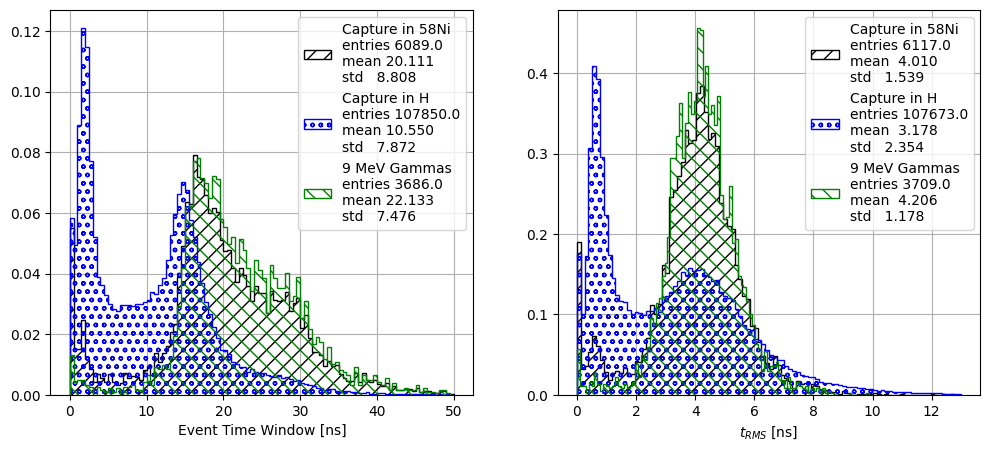

In [140]:
subplot = pltext.canvas(2)

subplot(1)
pltext.hist(windowTimeGammasFromNi, 100, hatch="//",   ylog=False, density=True, range=(0, 50), xylabels="Event Time Window [ns]", label="Capture in 58Ni");
pltext.hist(windowTimeGammasFromH,  100, hatch="oo",   ylog=False, density=True, range=(0, 50), xylabels="Event Time Window [ns]", label="Capture in H");
pltext.hist(windowTimeGammas9MeV,   100, hatch="\\\\", ylog=False, density=True, range=(0, 50), xylabels="Event Time Window [ns]", label="9 MeV Gammas");

subplot(2)
pltext.hist(windowTrmsGammasFromNi, 100, hatch="//",   ylog=False, density=True, range=(0, 13), xylabels="$t_{RMS}$ [ns]", label="Capture in 58Ni");
pltext.hist(windowTrmsGammasFromH,  100, hatch="oo",   ylog=False, density=True, range=(0, 13), xylabels="$t_{RMS}$ [ns]", label="Capture in H");
pltext.hist(windowTrmsGammas9MeV,   100, hatch="\\\\", ylog=False, density=True, xylabels="$t_{RMS}$ [ns]", label="9 MeV Gammas");

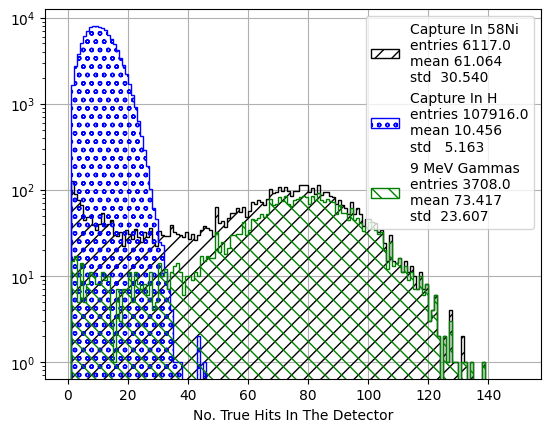

In [85]:
pltext.hist([i for i in nOfHitsNi   if i!=0], 150, range=(0, 150), hatch="//",  ylog=True, density=False, xylabels="No. True Hits In The Detector", label="Capture In 58Ni");
pltext.hist([i for i in nOfHitsH    if i!=0], 150, range=(0, 150), hatch="oo", ylog=True, density=False, xylabels="No. True Hits In The Detector", label="Capture In H");
pltext.hist([i for i in nOfHits9MeV if i!=0], 150, range=(0, 150), hatch="\\\\",  ylog=True, density=False, xylabels="No. True Hits In The Detector", label="9 MeV Gammas");

In [ ]:
# import pickle

# with open('windowTimeGammasFromNi.pkl', 'wb') as f:
#     pickle.dump(windowTimeNi, f)

# with open('windowTrmsGammasFromNi.pkl', 'wb') as f:
#     pickle.dump(windowTrmsNi, f)

# with open('windowTimeGammasFromH.pkl', 'wb') as f:
#     pickle.dump(windowTimeH, f)

# with open('windowTrmsGammasFromH.pkl', 'wb') as f:
#     pickle.dump(windowTrmsH, f)

# with open('nOfHitsNi.pkl', 'wb') as f:
#     pickle.dump(nOfHitsNi, f)
    
# with open('nOfHitsH.pkl', 'wb') as f:
#     pickle.dump(nOfHitsH, f)

# with open('windowTimeGammas9MeV.pkl', 'wb') as f:
#     pickle.dump(windowTime9MeV, f)

# with open('windowTrmsGammas9MeV.pkl', 'wb') as f:
#     pickle.dump(windowTrms9MeV, f)

# with open('nOfHits9MeV.pkl', 'wb') as f:
#     pickle.dump(nOfHits9MeV, f)

### Cherenkov Window and tRMS For 9 MeV Gammas

In [20]:
len(df_simpleTracks[(df_simpleTracks["track_pid"].values == 22) & (df_simpleTracks["track_energy"].values > 8.8)]["event_id"].unique())

3513

In [21]:
df_gammas_9MeV = df_gammas_from_59Ni[df_gammas_from_59Ni["track_energy"].values > 8.9]

In [22]:
df_gammas_9MeV.head()

,event_id,track_pid,track_id,track_parent,track_energy
0,22,22,12,2,8.998392
4,40,22,7,1,8.998402
6,62,22,38,6,8.998398
8,65,22,6,1,8.999294
9,65,22,12,3,8.998403


In [58]:
gamma9MeVEvents = df_gammas_9MeV["event_id"].unique()
windowTime9MeV = []
windowTrms9MeV = []
nOfHits9MeV = []

for ev in tqdm(gamma9MeVEvents, total=len(gamma9MeVEvents)):
    track_temp_df = df_simpleTracks[df_simpleTracks["event_id"].values == ev]
    hits_temp_df  = df_trueHits[df_trueHits["event_id"].values == ev]

    gammas9MeV = df_gammas_9MeV[df_gammas_9MeV["event_id"].values == ev]["track_id"].values

    if len(gammas9MeV) == 1:
        eFromGamma = track_temp_df[(track_temp_df["track_parent"].isin(gammas9MeV))]["track_id"].values
        hit_time   = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFromGamma)]["true_hit_time"]
        windowTime9MeV.append(np.max(hit_time) - np.min(hit_time))
        windowTrms9MeV.append(np.std(hit_time))
        nOfHits9MeV.append(len(hit_time))
    
    if len(gammas9MeV) > 1:
        for gamma in gammas9MeV:
            eFromGamma = track_temp_df[(track_temp_df["track_parent"].values == gamma)]["track_id"].values
            hit_time   = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFromGamma)]["true_hit_time"]
            windowTime9MeV.append(np.max(hit_time) - np.min(hit_time))
            windowTrms9MeV.append(np.std(hit_time))
            nOfHits9MeV.append(len(hit_time))

  0%|          | 0/3491 [00:00<?, ?it/s]

In [59]:
len(windowTime9MeV), len(windowTrms9MeV), len(nOfHits9MeV)

(4139, 4139, 4139)

In [27]:
windowTimeGammas9MeV = removeNaN(windowTime9MeV)
windowTrmsGammas9MeV = removeNaN(windowTrms9MeV)

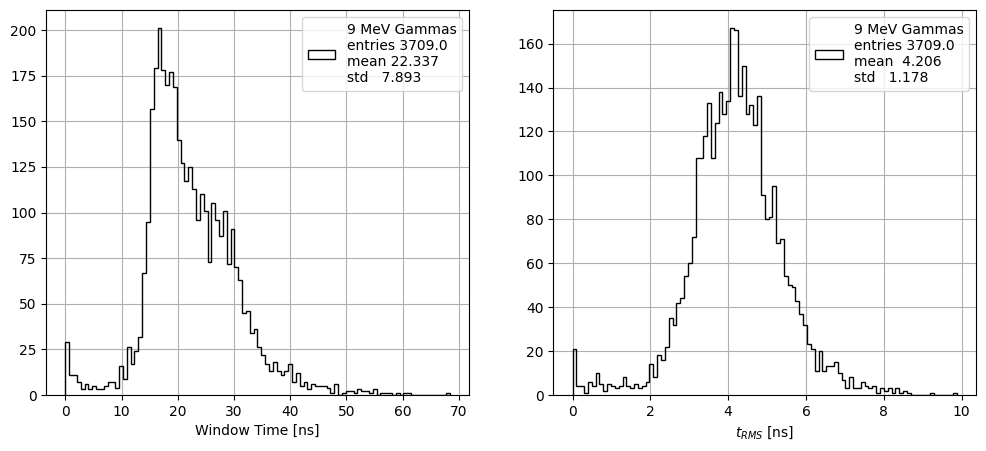

In [14]:
subplot = pltext.canvas(2)

subplot(1)
pltext.hist(windowTimeGammas9MeV, 100, ylog=False, xylabels="Window Time [ns]", label="9 MeV Gammas");

subplot(2)
pltext.hist(windowTrmsGammas9MeV, 100, ylog=False, xylabels="$t_{RMS}$ [ns]", label="9 MeV Gammas");


### Old Approach

In [ ]:
df_NickelInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_rf"].values > 6.75) & 
                                (df_simpleTracks["track_pid"].values == 1000280590)]

df_GammasInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_rf"].values > 6.75) & 
                                (df_simpleTracks["track_pid"].values == 22)]

eventsBallLight = np.unique(df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                            (df_simpleTracks["track_rf"].values > 6.75) & 
                                            (df_simpleTracks["track_pid"].values == 1000280590)]["event_id"])

timeWindowFromBallNickel = []
# timeRMSFromBallNickel = []

for ev in tqdm(eventsBallLight, total=len(eventsBallLight)):
    nickelFromBallCapture = df_NickelInBall[(df_NickelInBall["event_id"].values == ev)]["track_parent"].values
    # print(ev)
    # print(nickelFromBallCapture)

    gammasFromBallCapture = df_GammasInBall[(df_GammasInBall["event_id"].values == ev) & (df_GammasInBall["track_parent"].isin(nickelFromBallCapture))]["track_id"].values
    
    # print(gammasFromBallCapture)
    electronsFromNickel = df_simpleTracks[(df_simpleTracks["event_id"].values == ev) & 
                                          (df_simpleTracks["track_parent"].isin(gammasFromBallCapture))]["track_id"].values

    # print(electronsFromNickel)

    timeWindowFromBallNickel.append(np.max(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                                (df_trueHits["true_hit_parent"].isin(electronsFromNickel))]["true_hit_time"]) - 
                                    np.min(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                                (df_trueHits["true_hit_parent"].isin(electronsFromNickel))]["true_hit_time"])
                            )
    # print(timeWindowFromBallNickel)
    
    # timeRMSFromBallGamma.append(np.std(df_trueHits[(df_trueHits["event_id"].values == ev) & 
    #                                             (df_trueHits["true_hit_parent"].isin(electronsFromGamma))]["true_hit_time"]))

  0%|          | 0/434 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [47]:
df_HInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_ri"].values < 6.8) & 
                                (df_simpleTracks["track_pid"].values == 1000010020)]

df_GammasInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_ri"].values < 6.8) & 
                                (df_simpleTracks["track_pid"].values == 22)]

eventsBallLight = np.unique(df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                            (df_simpleTracks["track_ri"].values < 6.8) & 
                                            (df_simpleTracks["track_pid"].values == 1000010020)]["event_id"])

timeWindowFromBallH = []
# timeRMSFromBallNickel = []

for ev in tqdm(eventsBallLight, total=len(eventsBallLight)):
    hFromBallCapture = df_HInBall[(df_HInBall["event_id"].values == ev)]["track_parent"].values
    # print(ev)
    # print(nickelFromBallCapture)

    gammasFromBallCapture = df_GammasInBall[(df_GammasInBall["event_id"].values == ev) & (df_GammasInBall["track_parent"].isin(hFromBallCapture))]["track_id"].values
    
    # print(gammasFromBallCapture)
    electronsFromH = df_simpleTracks[(df_simpleTracks["event_id"].values == ev) & 
                                          (df_simpleTracks["track_parent"].isin(gammasFromBallCapture))]["track_id"].values

    # print(electronsFromNickel)

    timeWindowFromBallH.append(np.max(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                                (df_trueHits["true_hit_parent"].isin(electronsFromH))]["true_hit_time"]) - 
                                    np.min(df_trueHits[(df_trueHits["event_id"].values == ev) & 
                                                (df_trueHits["true_hit_parent"].isin(electronsFromH))]["true_hit_time"]))

  0%|          | 0/600 [00:00<?, ?it/s]

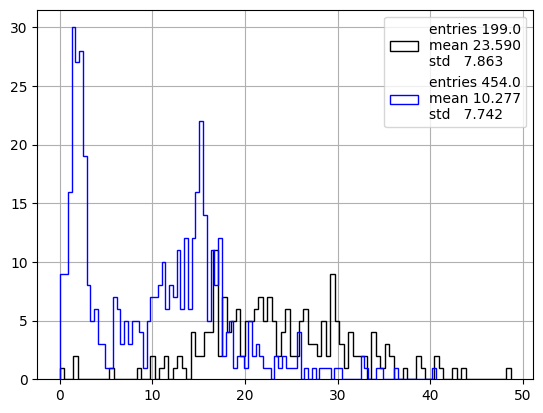

In [ ]:
# timeWindowFromBallH = removeNaN(timeWindowFromBallH)
# timeWindowFromBallH = [i for i in timeWindowFromBallH if i < 200 and i > 0]

timeWindowFromBallNickel = removeNaN(timeWindowFromBallNickel)
timeWindowFromBallNickel = [i for i in timeWindowFromBallNickel if i < 200 and i > 0]

pltext.hist(timeWindowFromBallNickel, 100, ylog=False);
pltext.hist(timeWindowFromBallH, 100, ylog=False);

In [50]:
df_simpleTracks[(df_simpleTracks["event_id"].values == 1) & (df_simpleTracks["track_parent"].values == 59)]

,event_id,track_pid,track_id,track_parent,track_creator_process,track_energy,track_ti,track_ri,track_rf


In [51]:
df_NickelInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_ri"].values < 6.8) & 
                                (df_simpleTracks["track_pid"].values == 1000280590)]

df_GammasInBall = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                (df_simpleTracks["track_ri"].values < 6.8) & 
                                (df_simpleTracks["track_pid"].values == 22)]

eventsBallLight = np.unique(df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                                            (df_simpleTracks["track_ri"].values < 6.8) & 
                                            (df_simpleTracks["track_pid"].values == 1000280590)]["event_id"])

gammaFromBallNickelEnergy = []


for ev in tqdm(eventsBallLight, total=len(eventsBallLight)):
    nickelFromBallCapture = df_NickelInBall[(df_NickelInBall["event_id"].values == ev)]["track_parent"].values

    gammaFromBallNickelEnergy.append(df_GammasInBall[(df_GammasInBall["event_id"].values == ev) & (df_GammasInBall["track_parent"].isin(nickelFromBallCapture))]["track_energy"].values)
    

  0%|          | 0/229 [00:00<?, ?it/s]

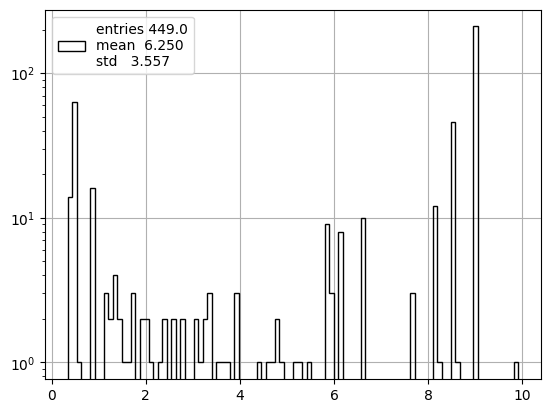

In [52]:
pltext.hist(np.concatenate(gammaFromBallNickelEnergy), 100, ylog=True);

In [17]:
df_GammasInBall[df_GammasInBall["track_energy"].values > 8]

,event_id,track_pid,track_id,track_parent,track_creator_process,track_energy,track_ti,track_ri,track_rf
135,135,22,12,3,nCapture,8.120749,47716.203125,4.469991,9.993267
298,298,22,8,2,nCapture,8.998559,136526.75,4.596995,5.004608
668,668,22,14,3,nCapture,8.659193,134898.890625,5.228527,20.695053
818,818,22,25,6,nCapture,10.829113,128655.703125,4.4748,13.357937
848,848,22,3,1,nCapture,8.120749,112972.742188,6.000269,139.991791
1251,1251,22,22,4,nCapture,8.998559,138226.515625,6.177132,13.089684
1314,1314,22,11,3,nCapture,8.120749,11981.160156,2.555382,43.833515
1587,1587,22,31,6,nCapture,8.659193,175054.140625,5.759274,6.986701
1630,1630,22,7,1,nCapture,8.120749,29732.708984,1.967238,59.008266
2185,2185,22,4,1,nCapture,8.99856,20004.970703,4.410241,3.993304


# Gammas From 59 Ni: 9 MeV Gamma Products

### Check The Energy Spectrum Looks Right (i.e. 9 MeV peak visible)


Compare with full gamma spectrum from simulation

![alt text](../figures/gammaSpectrumNiCf.jpg "Gamma Energy Spectrum From Dedicated Simulation")

In [18]:
ni59Events = df_simpleTracks[df_simpleTracks["track_pid"].values == 1000280590]["event_id"].unique()

In [19]:
len(ni59Events)

4294

In [21]:
df_gammas_world_ni59 = df_simpleTracks[(df_simpleTracks["event_id"].isin(ni59Events)) & (df_simpleTracks["track_pid"].values == 22)]

In [22]:
len(df_gammas_world_ni59)

22774

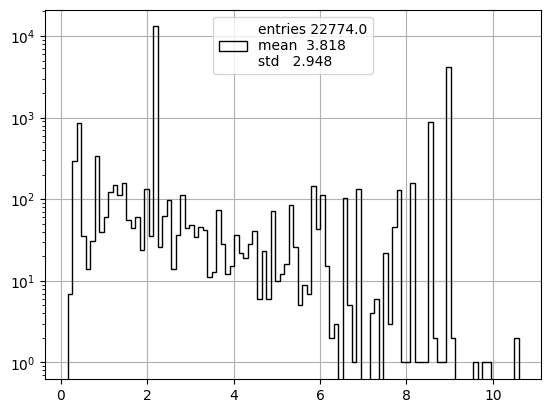

In [23]:
pltext.hist(df_gammas_world_ni59["track_energy"].values, 100, ylog=True);

### Some Comprobations With Gamma Energy

In [17]:
df_gammas_world_ni59[df_gammas_world_ni59["track_energy"].values > 8.99].head()

,event_id,track_pid,track_id,track_parent,track_creator_process,track_energy,track_ti,track_ri,track_rf
22,22,22,12,2,nCapture,8.998392,17852.742188,5.946587,88.56472
40,40,22,7,1,nCapture,8.998402,54649.394531,3.170509,56.064587
65,65,22,6,1,nCapture,8.999294,89874.796875,4.763932,143.485321
65,65,22,12,3,nCapture,8.998403,14505.618164,5.502195,98.180046
66,66,22,9,1,nCapture,8.999296,5761.251953,6.248477,43.434723


In [53]:
df_simpleTracks[(df_simpleTracks["event_id"].values == 40) & (df_simpleTracks["track_pid"].values == 22) & (df_simpleTracks["track_creator_process"].values == "nCapture")].sort_values("track_id")

,event_id,track_pid,track_id,track_parent,track_creator_process,track_energy,track_ti,track_ri,track_rf
40,40,22,7,1,nCapture,8.998402,54649.394531,3.170509,56.064587
40,40,22,8,1,nCapture,4.858601,54649.394531,3.170509,108.576302
40,40,22,15,2,nCapture,2.224384,65281.898438,6.672647,43.383423
40,40,22,24,3,nCapture,2.224383,136506.546875,29.41078,8.187104
40,40,22,32,4,nCapture,2.224376,50512.980469,61.701912,71.273933


In [56]:
eFrom9Gamma   = df_simpleTracks[(df_simpleTracks["event_id"].values == 40) & (df_simpleTracks["track_parent"].values == 7)].sort_values("track_id")["track_id"].values
eFromLowGamma = df_simpleTracks[(df_simpleTracks["event_id"].values == 40) & (df_simpleTracks["track_parent"].values == 15)].sort_values("track_id")["track_id"].values

In [57]:
print(len(df_simpleTracks[(df_simpleTracks["event_id"].values == 40) & (df_simpleTracks["track_parent"].isin(eFrom9Gamma))].sort_values("track_id")))
print(len(df_simpleTracks[(df_simpleTracks["event_id"].values == 40) & (df_simpleTracks["track_parent"].isin(eFromLowGamma))].sort_values("track_id")))
print("9 MeV Gamma produces 6 times more Cherenkov photons than other lower energy gammas")


84
593
9 MeV Gamma produces 6 times more Cherenkov photons than other lower energy gammas


In [58]:
df_trueHits[(df_trueHits["event_id"].values == 40) & (df_trueHits["true_hit_parent"].isin(eFrom9Gamma))]["true_hit_time"]

40    54656.476562
Name: true_hit_time, dtype: object

### Actual Code And Results

In [85]:
ni59Events = df_gammas_world_ni59["event_id"].unique()
windowTime = []
windowTrms = []

for ev in tqdm(ni59Events, total=len(ni59Events)):
    track_temp_df = df_simpleTracks[df_simpleTracks["event_id"].values == ev]
    hits_temp_df  = df_trueHits[df_trueHits["event_id"].values == ev]

    highEGammas = track_temp_df[(track_temp_df["track_pid"].values == 22)]["track_id"].values

    if len(highEGammas) == 1:
        eFrom9Gamma = track_temp_df[(track_temp_df["track_parent"].isin(highEGammas))]["track_id"].values
        hit_time    = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFrom9Gamma)]["true_hit_time"]
        windowTime.append(np.max(hit_time) - np.min(hit_time))
        windowTrms.append(np.std(hit_time))
    
    if len(highEGammas) > 1:
        for gamma in highEGammas:
            eFrom9Gamma = track_temp_df[(track_temp_df["track_parent"].values == gamma)]["track_id"].values
            hit_time    = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFrom9Gamma)]["true_hit_time"]
            windowTime.append(np.max(hit_time) - np.min(hit_time))
            windowTrms.append(np.std(hit_time))

    # print(ev)
    # print(highEGammas)
    # print(eFrom9Gamma)
    # print(windowTime)

  0%|          | 0/434 [00:00<?, ?it/s]

In [ ]:
# windowTime9MeV = removeNaN(windowTime)
# windowTrms9MeV = removeNaN(windowTrms)
# windowTimeBiggerThan2500keV = removeNaN(windowTime)
# windowTrmsBiggerThan2500keV = removeNaN(windowTrms)
# windowTimeNoERestriction = removeNaN(windowTime)
# windowTrmsNoERestriction = removeNaN(windowTrms)

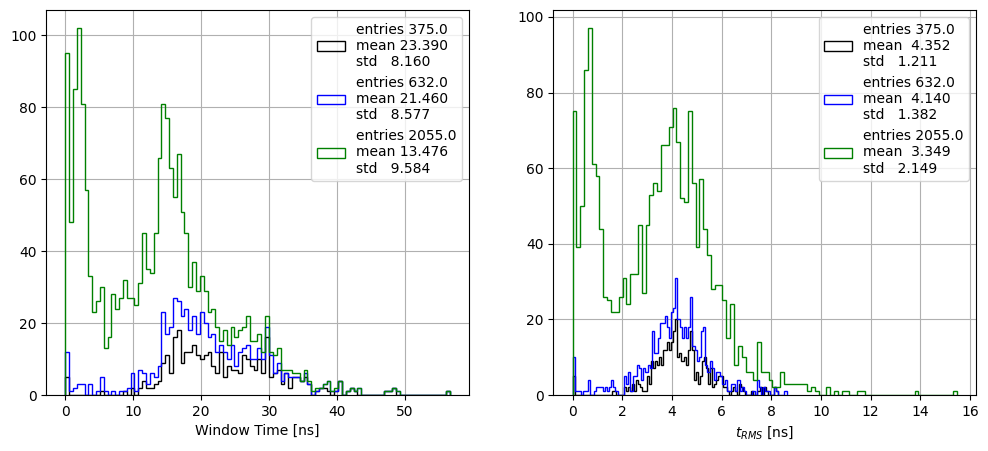

In [87]:
subplot = pltext.canvas(2)

subplot(1)
pltext.hist(windowTime9MeV, 100, xylabels="Window Time [ns]");
pltext.hist(windowTimeBiggerThan2500keV, 100);
pltext.hist(windowTimeNoERestriction, 100);

subplot(2)
pltext.hist(windowTrms9MeV, 100, xylabels="$t_{RMS}$ [ns]");
pltext.hist(windowTrmsBiggerThan2500keV, 100);
pltext.hist(windowTrmsNoERestriction, 100);

### Same But For All Gammas Coming From nCapture Even Though Is Not A nCapture In Nickel

In [ ]:
ni59Events = df_simpleTracks[(df_simpleTracks["track_pid"].values == 22)]["event_id"].unique()

In [ ]:
df_gammas_world_ni59 = df_simpleTracks[(df_simpleTracks["event_id"].isin(ni59Events)) & (df_simpleTracks["track_pid"].values == 22) & (df_simpleTracks["track_rf"] > 6.75)]

# tRMS vs. nHits Plots

In [48]:
len(windowTrmsGammas9MeV), len(nOfHits9MeV)

(4139, 3709)

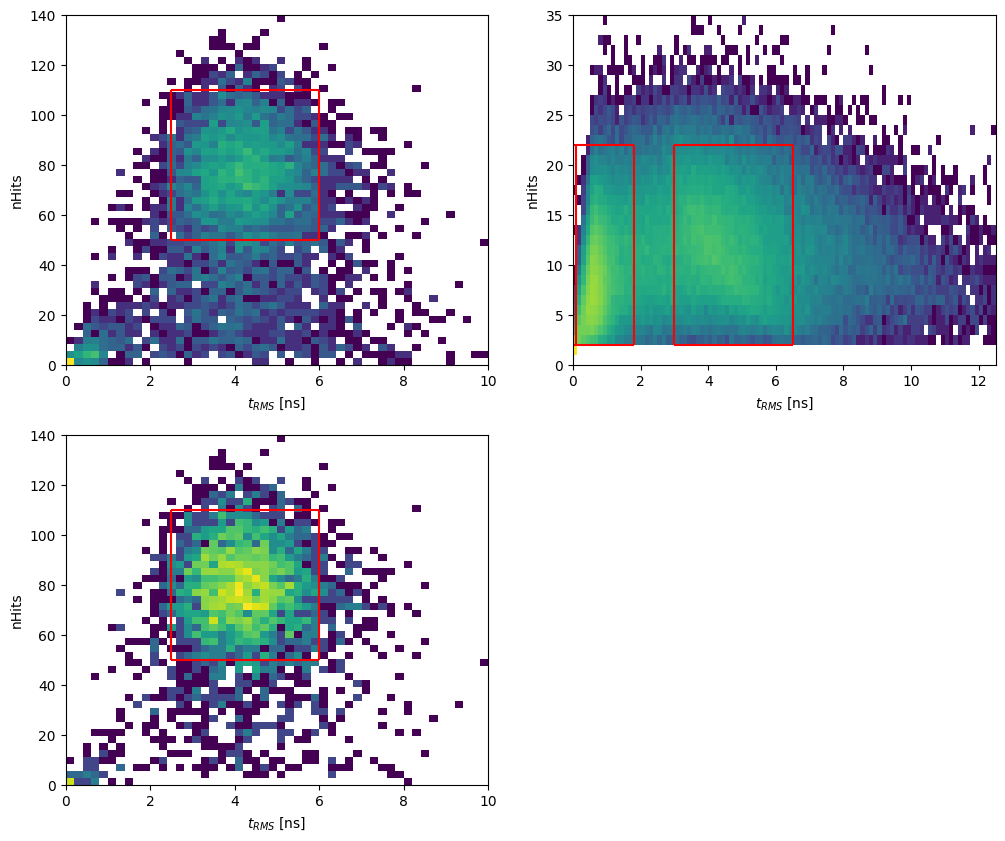

In [116]:
subplot = pltext.canvas(3)

subplot(1)
plt.hist2d(windowTrmsGammasFromNi, nOfHitsNi, (50, 50), norm="log", range=((0,10),(0,140)));
plt.hlines(50,  2.5, 6, color="red");
plt.hlines(110, 2.5, 6, color="red");
plt.vlines(2.5, 50,  110, color="red");
plt.vlines(6,   50,  110, color="red");
plt.xlabel("$t_{RMS}$ [ns]");
plt.ylabel("nHits");

subplot(2)
plt.hist2d(windowTrmsGammasFromH, nOfHitsH, (100, 35), norm="log", range=((0,12.5),(0,35)));

plt.hlines(2,  0, 1.8, color="red");
plt.hlines(22, 0, 1.8, color="red");
plt.vlines(0.1,   2,  22, color="red");
plt.vlines(1.8, 2,  22, color="red");

plt.hlines(2,   3.0, 6.5, color="red");
plt.hlines(22,  3.0, 6.5, color="red");
plt.vlines(3.0, 2,  22, color="red");
plt.vlines(6.5, 2,  22, color="red");

plt.xlabel("$t_{RMS}$ [ns]");
plt.ylabel("nHits");

subplot(3)
plt.hist2d(windowTrmsGammas9MeV, nOfHits9MeV, (50,50), norm="log", range=((0,10),(0,140)));
plt.hlines(50,  2.5, 6, color="red");
plt.hlines(110, 2.5, 6, color="red");
plt.vlines(2.5, 50,  110, color="red");
plt.vlines(6,   50,  110, color="red");
plt.xlabel("$t_{RMS}$ [ns]");
plt.ylabel("nHits");

In [88]:
len(windowTrmsGammasFromH), len(nOfHitsH), len(windowTimeGammasFromH)

(107916, 107916, 107916)

# New Cherenkov Window: $t_i - \text{min}(t)$

In [145]:
ni59Events   = df_gammas_from_59Ni["event_id"].unique()
windowTimeNi = []
windowTrmsNi = []
nOfHitsNi    = []
newindowTimeNi = []

for ev in tqdm(ni59Events, total=len(ni59Events)):
    track_temp_df = df_simpleTracks[df_simpleTracks["event_id"].values == ev]
    hits_temp_df  = df_trueHits[df_trueHits["event_id"].values == ev]

    gammasFromNi = df_gammas_from_59Ni[df_gammas_from_59Ni["event_id"].values == ev]["track_id"].values

    if len(gammasFromNi) == 1:
        eFromGamma = track_temp_df[(track_temp_df["track_parent"].isin(gammasFromNi))]["track_id"].values
        hit_time   = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFromGamma)]["true_hit_time"]
        windowTimeNi.append(np.max(hit_time) - np.min(hit_time))
        windowTrmsNi.append(np.std(hit_time))
        nOfHitsNi.append(len(hit_time))
        a = [t - np.min(hit_time) for t in hit_time]
    
    if len(gammasFromNi) > 1:
        for gamma in gammasFromNi:
            eFromGamma = track_temp_df[(track_temp_df["track_parent"].values == gamma)]["track_id"].values
            hit_time    = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFromGamma)]["true_hit_time"]
            windowTimeNi.append(np.max(hit_time) - np.min(hit_time))
            windowTrmsNi.append(np.std(hit_time))
            nOfHitsNi.append(len(hit_time))
            a = [t - np.min(hit_time) for t in hit_time]

    newindowTimeNi.append(a)
     
newindowTimeNi = np.concatenate(newindowTimeNi)

h2Events = df_gammas_from_2H["event_id"].unique()
windowTimeH = []
windowTrmsH = []
nOfHitsH = []
newindowTimeH = []

for ev in tqdm(h2Events, total=len(h2Events)):
    track_temp_df = df_simpleTracks[df_simpleTracks["event_id"].values == ev]
    hits_temp_df  = df_trueHits[df_trueHits["event_id"].values == ev]

    gammasFromH = df_gammas_from_2H[df_gammas_from_2H["event_id"].values == ev]["track_id"].values

    if len(gammasFromH) == 1:
        eFromGamma = track_temp_df[(track_temp_df["track_parent"].isin(gammasFromH))]["track_id"].values
        hit_time    = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFromGamma)]["true_hit_time"]
        windowTimeH.append(np.max(hit_time) - np.min(hit_time))
        windowTrmsH.append(np.std(hit_time))
        nOfHitsH.append(len(hit_time))
        a = [t - np.min(hit_time) for t in hit_time]
    
    if len(gammasFromH) > 1:
        for gamma in gammasFromH:
            eFromGamma = track_temp_df[(track_temp_df["track_parent"].values == gamma)]["track_id"].values
            hit_time    = hits_temp_df[hits_temp_df["true_hit_parent"].isin(eFromGamma)]["true_hit_time"]
            windowTimeH.append(np.max(hit_time) - np.min(hit_time))
            windowTrmsH.append(np.std(hit_time))
            nOfHitsH.append(len(hit_time))
            a = [t - np.min(hit_time) for t in hit_time]

    newindowTimeH.append(a)
     
newindowTimeH = np.concatenate(newindowTimeH)

  0%|          | 0/4294 [00:00<?, ?it/s]

  0%|          | 0/30832 [00:00<?, ?it/s]

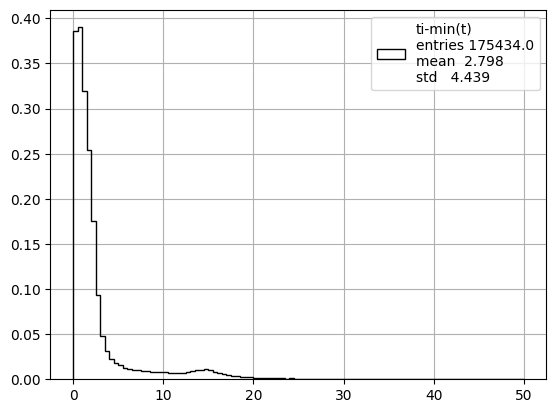

In [144]:
pltext.hist(newindowTime,           100, range=(0,50), ylog=False, density=True, label="ti-min(t)");
# pltext.hist(windowTimeGammasFromNi, 100, range=(0,50), density=True, label="max(t)-min(t)");